In [2]:
from pyslise2d import Pyslise2D
import numpy as np
from math import sqrt, log10, log

f = 1/(2*sqrt(5))
def V(x, y):
    return x*x + y*y + f * y * (x*x- y*y/3)

p = Pyslise2D(V, -6,6, -6,6, x_symmetric=True, tolerance=1e-9, N=28, steps_per_sector=1)

In [4]:
from pyslise2d import Pyslise2D
from math import sqrt

def V(x, y):
    return x*x + y*y + 1/(6*sqrt(5)) * y * (3*x*x- y*y)

problem = Pyslise2D(V, -6,6, -6,6, tolerance=1e-8)
result = problem.eigenvaluesByIndex(0, 16)
result 

[(0, 1.9971895321230373, 1),
 (1, 3.980153534991285, 2),
 (3, 5.9124859610824645, 1),
 (4, 5.970652737001732, 2),
 (6, 7.851927621336371, 2),
 (8, 7.964834589498699, 1),
 (9, 7.9715221248994155, 1),
 (10, 9.740287177949007, 1),
 (11, 9.797290911246584, 2),
 (13, 9.972502534992037, 2),
 (15, 11.634038165514449, 1),
 (16, 11.634055954700703, 1)]

In [6]:
values = [
    0.998595, 1.990077, 2.956243, 2.985326, 
    3.925964, 3.982417, 3.985761, 4.870144,
    4.898644, 4.986251, 5.817019, 5.817027, 5.867019,
]

for ixaru, (index, toon, mult) in zip(values, result):
    err, err_e = f"{abs(toon/2-ixaru):.1e}".split("e")
    head = " = ".join(f"E_{{{i}}}" for i in range(index, index+mult))
    print(f"${head}$ & ${ixaru}$ & ${toon/2:.13}$ & ${err}({int(err_e)})$ \\\\")

$E_{0}$ & $0.998595$ & $0.9985947660615$ & $2.3(-7)$ \\
$E_{1} = E_{2}$ & $1.990077$ & $1.990076767496$ & $2.3(-7)$ \\
$E_{3}$ & $2.956243$ & $2.956242980541$ & $1.9(-8)$ \\
$E_{4} = E_{5}$ & $2.985326$ & $2.985326368501$ & $3.7(-7)$ \\
$E_{6} = E_{7}$ & $3.925964$ & $3.925963810668$ & $1.9(-7)$ \\
$E_{8}$ & $3.982417$ & $3.982417294749$ & $2.9(-7)$ \\
$E_{9}$ & $3.985761$ & $3.98576106245$ & $6.2(-8)$ \\
$E_{10}$ & $4.870144$ & $4.870143588975$ & $4.1(-7)$ \\
$E_{11} = E_{12}$ & $4.898644$ & $4.898645455623$ & $1.5(-6)$ \\
$E_{13} = E_{14}$ & $4.986251$ & $4.986251267496$ & $2.7(-7)$ \\
$E_{15}$ & $5.817019$ & $5.817019082757$ & $8.3(-8)$ \\
$E_{16}$ & $5.817027$ & $5.81702797735$ & $9.8(-7)$ \\


In [7]:
Es = p.eigenvaluesByIndex(0,20)
Es

[(0, 1.9971895451273816, 1),
 (1, 3.980153520534191, 2),
 (3, 5.912485984490488, 1),
 (4, 5.970652854986002, 2),
 (6, 7.851927488276084, 2),
 (8, 7.964834601024425, 1),
 (9, 7.971521808960702, 1),
 (10, 9.740288715802864, 1),
 (11, 9.797289314328983, 2),
 (13, 9.972502133430241, 2),
 (15, 11.634039329482258, 1),
 (16, 11.634055122582179, 1),
 (17, 11.734039343053864, 1),
 (18, 11.762892391463673, 1),
 (19, 11.982654413122692, 2)]

In [40]:
for i, E, m in Es:
    print(f"E_{i} ({m}) = {E/2:.9f}  ({p.eigenvalueError(E):.1e})")

E_0 (1) = 0.998594773  (2.6e-11)
E_1 (2) = 1.990076760  (1.7e-11)
E_3 (1) = 2.956242990  (6.0e-11)
E_4 (2) = 2.985326428  (9.0e-11)
E_6 (2) = 3.925963745  (1.6e-10)
E_8 (1) = 3.982417300  (1.1e-10)
E_9 (1) = 3.985760913  (1.2e-10)
E_10 (1) = 4.870144356  (7.1e-11)
E_11 (2) = 4.898644665  (7.3e-11)
E_13 (2) = 4.986251054  (1.5e-10)
E_15 (1) = 5.817019692  (5.8e-11)
E_16 (1) = 5.817027563  (1.9e-10)
E_17 (1) = 5.867019678  (8.8e-11)
E_18 (1) = 5.881446216  (1.1e-10)
E_19 (2) = 5.991327154  (1.8e-10)


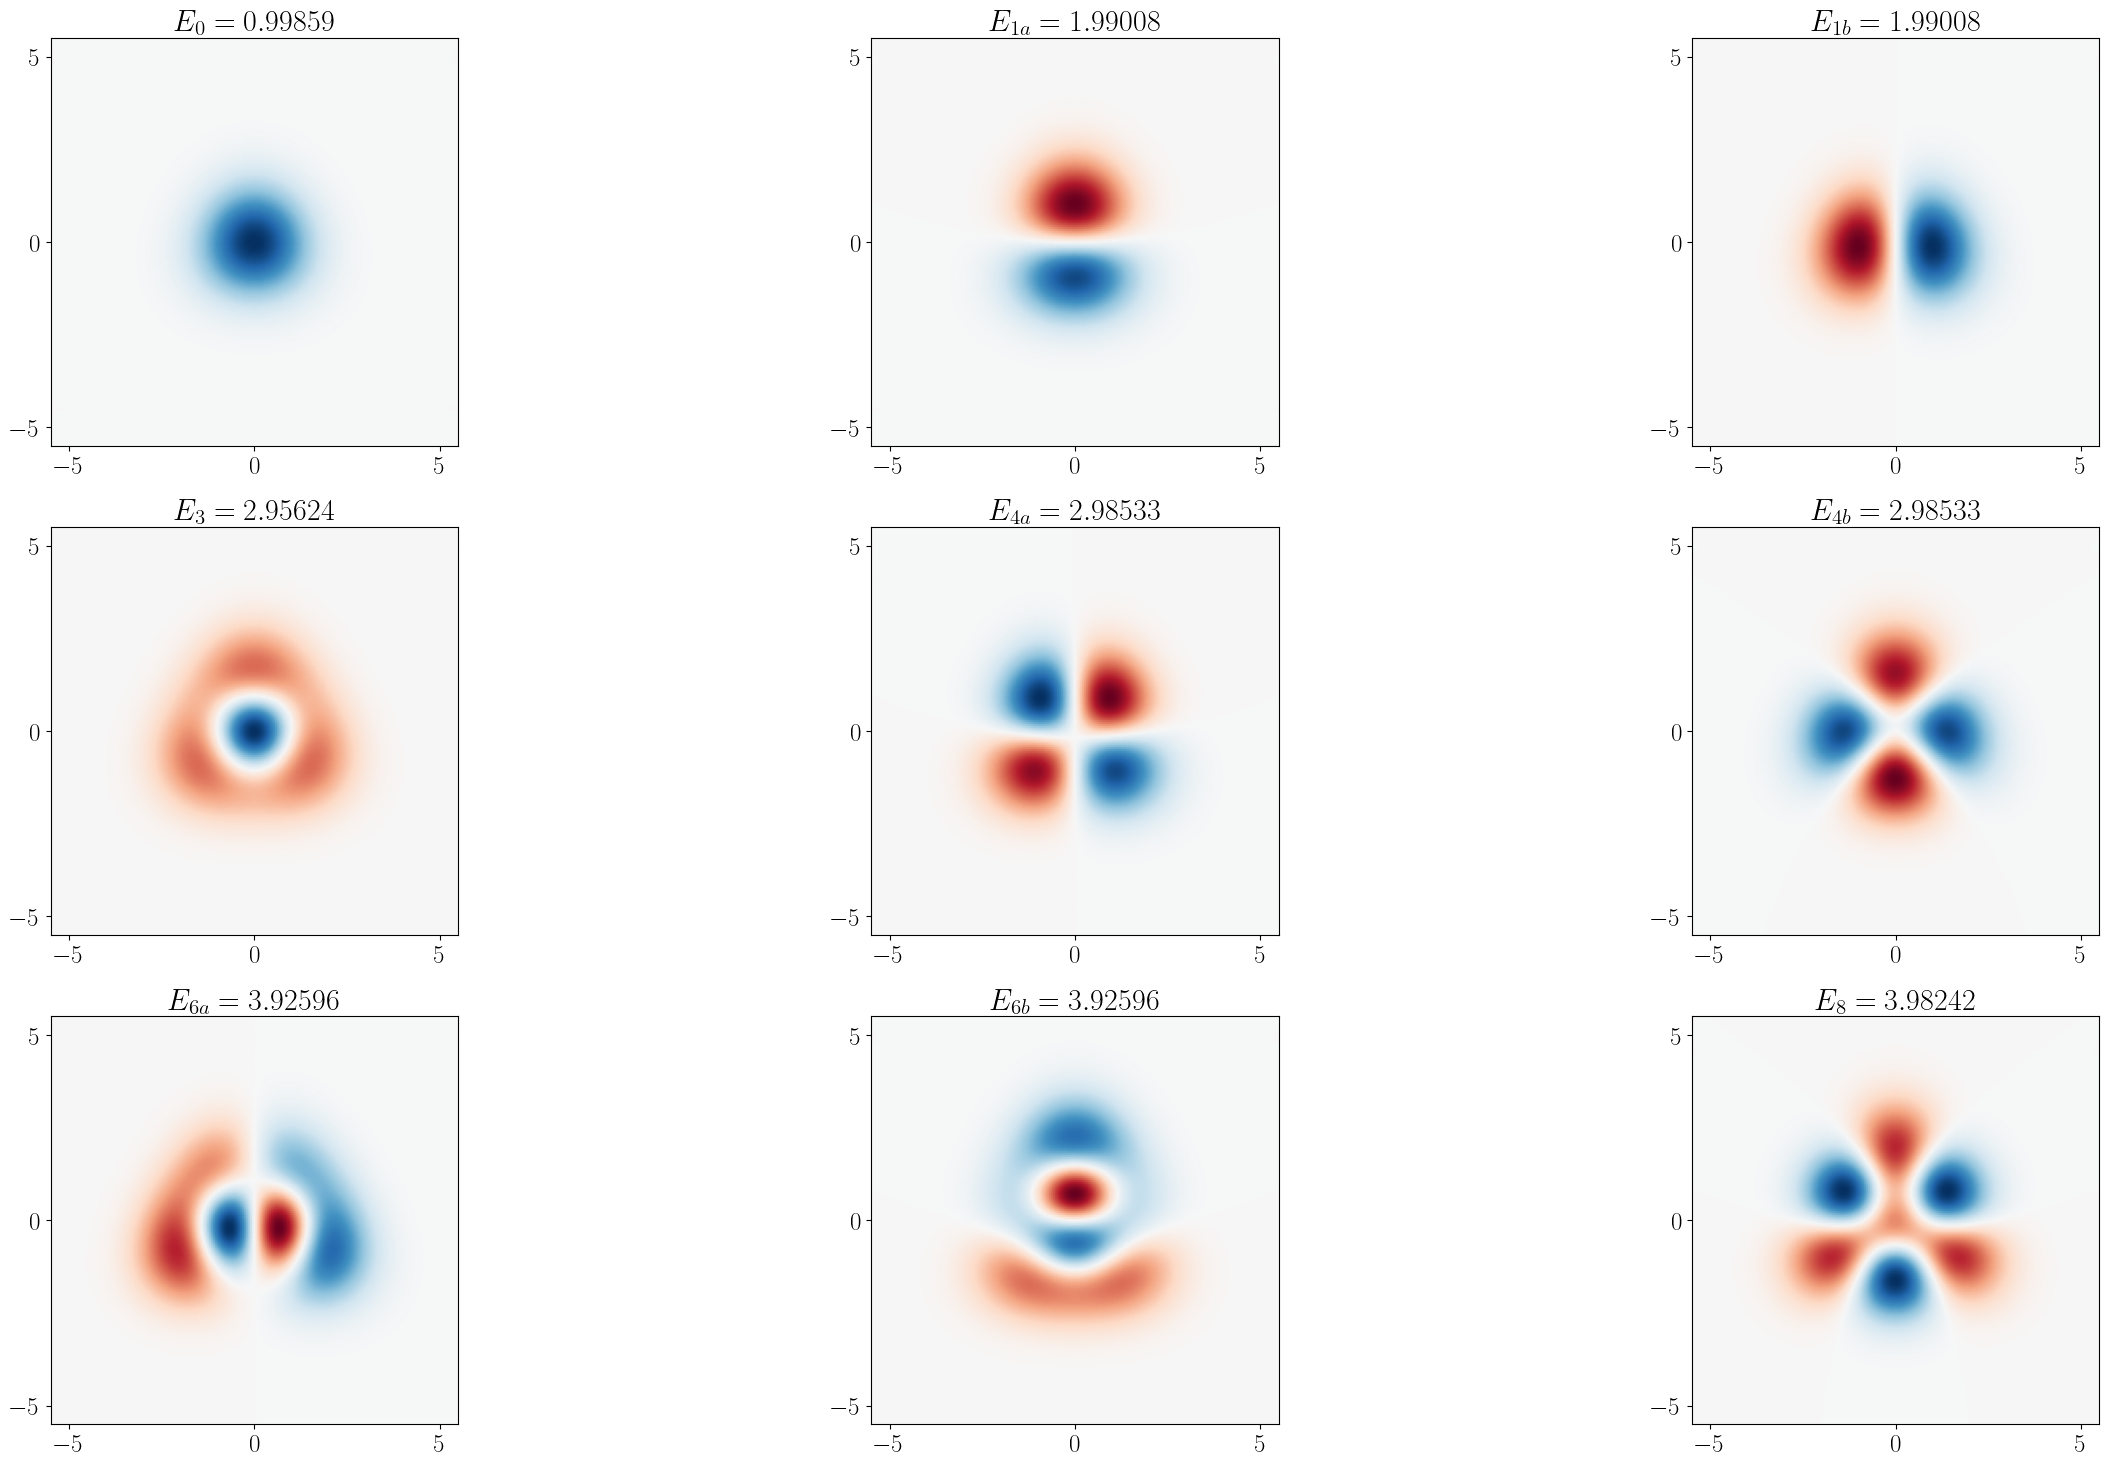

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc
import string
import numpy as np

x = np.linspace(-5.5, 5.5, 211)
y = np.linspace(-5.5, 5.5, 211)

rc('text', usetex=True)
rc('font', size=18)

cols = 3
rows = 3
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(30, 18))

fig_index = 0
for i, E, m in Es:
    for name, f in zip(string.ascii_lowercase, p.eigenfunction(E)):
        r = fig_index//cols
        c = fig_index%cols
        if r >= rows:
            break
        z = f(x, y)
        vmax = np.max(np.abs(z))
        ax = axes[r][c]
        ax.set_xticks(ticks=[-5,0,5])
        ax.set_yticks(ticks=[-5,0,5])
        ax.set_aspect(1)
        ax.set_title(f"$E_{{{i}{'' if m == 1 else name}}} = {E/2:.5f}$")
        ax.pcolormesh(x, y, z.T, shading='gouraud', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)
        fig_index += 1
    else:
        continue
    break

#plt.savefig("../images/henon_heiles_eigenfunctions.png", bbox_inches='tight')

In [5]:
import sys

In [6]:
sys.executable

'/opt/miniconda3/bin/python'